# CHAPTER 11

## Financial and Economic Data Applications

In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
from datetime import datetime

Sử dụng Python trong ngành tài chính tăng nhanh một cách đáng kể từ năm 2005, chủ
yếu là do sự lớn mạnh của các thư viện (như Numpy và Pandas) và kĩ năng sẵn có của
các lập trình viên Python chuyên nghiệp. Các tổ chức, cơ quan đã nhận thấy rằng Python
rất phù hợp với cả vai trò là một môi trường phân tích tương tác cũng như cho phép các
hệ thống mạnh mẽ được phát triển thường xuyên trong một khoảng thời gian ngắn so với
Java hoặc C++. Python cũng là một ngôn ngữ lý tưởng để xây dựng giao diện Python
cho các thư viện kế thừa được xây dựng trong C hoặc C++.

Trong những ví dụ này, tôi sẽ sử dụng thuật ngữ cross-section để chỉ dữ liệu tại một thời
điểm cố định. Ví dụ, giá đóng cửa của toàn bộ cổ phiếu của chỉ số S&P 500 vào một
ngày cụ thể tạo thành một cross-section. Dữ liệu cross-sectional tại nhiều thời điểm trên
nhiều mục dữ liệu (ví dụ như giá cả với khối lượng ) tạo thành một bảng điều khiển. Dữ
liệu bảng điều khiển có thành tạo thành bảng ở dưới dạng DataFrame hoặc sử dụng đối
tượng pandas Panel ba chiều

Data Munging Topics

Nhiều công cụ tổng hợp dữ liệu hữu ích cho các ứng dụng tài chính được trải rộng trong
các chương trước. Ở đây tôi sẽ nêu nổi bật một số chủ đề vì chúng liên quan đến đề này.

## 1.1 Time Series and Cross-Section Alignment

Một trong những vấn đề tốn nhiều thời gian nhất khi làm việc với dữ liệu tài chính là
vấn đề liên kết dữ liệu .Hai chuỗi thời gian liên quan có thể có các chỉ số không phù hợp
với nhau, hoặc hai đối tượng DataFrame có thể có các cột hoặc nhãn hàng không khớp.
Người dùng MATLAB, R và các ngôn ngữ lập trình ma trận khác thường đầu tư công
sức nỗ lực một cách đáng kể vào việc gói dữ liệu thành các dạng được căn chỉnh hoàn
hảo. Với kinh nghiệm, phải căn chỉnh dữ liệu bằng tay và tệ hơn là phải xác minh rằng
dữ liệu được căn chỉnh) là một cách cứng nhắc và nhàm chán . Nó cũng tiềm ẩn rất nhiều
lỗi do kết hợp dữ liệu bị lệch không đồng nhất với nhau.

Pandas thực hiện một cách tiếp cận thay thế bằng cách tự động căn chỉnh dữ liệu trong
các phép toán số học. Trên thực tế, điều này mang lại sự tự do to lớn và nâng cao năng
suất của bạn. Ví dụ: hãy xem xét một vài DataFrames chứa chuỗi thời gian về giá và khối
lượng cổ phiếu

In [3]:
b = [[379.74,  64.64  , 1165.24,  71.15 ],
       [383.93,  65.43, 1198.62 , 73.65],
       [384.14,  64.95, 1185.90, 72.82],
       [377.48,  63.64,  1154.23,  71.01],
       [379.94 ,  63.59 , 1162.27 , 71.84],
       [384.62,  63.61 , 1172.87 , 71.65],
       [389.30,  63.73,  1188.68,  72.64]]
b = np.array(b)
c = [[18173500,  15848300 , 25416300],
       [12492000, 10759700, 23108400],
       [14839800 , 15551500, 22434800],
       [20171900, 17008200,  27969100],
       [16697300, 13448200 , 26205800 ]]
c = np.array(c)
c

array([[18173500, 15848300, 25416300],
       [12492000, 10759700, 23108400],
       [14839800, 15551500, 22434800],
       [20171900, 17008200, 27969100],
       [16697300, 13448200, 26205800]])

In [4]:
#c =pd.date_range('9/6/2011', periods=7) 
d = ['2011-09-06','2011-09-07','2011-09-08','2011-09-09','2011-09-12','2011-09-13','2011-09-14']
e = ['2011-09-06','2011-09-07','2011-09-08','2011-09-09','2011-09-12']

In [5]:
prices = pd.DataFrame(b,
                     index=d,
                     columns=['AAPL', 'JNJ', 'SPX', 'XOM'])
volume = pd.DataFrame(c,
                     index=e,
                     columns=['AAPL', 'JNJ', 'XOM'])

In [6]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [7]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500,15848300,25416300
2011-09-07,12492000,10759700,23108400
2011-09-08,14839800,15551500,22434800
2011-09-09,20171900,17008200,27969100
2011-09-12,16697300,13448200,26205800


Giả sử bạn muốn tính giá trung bình theo khối lượng bằng cách sử dụng tất cả
dữ liệu (và đưa ra giả định đơn giản hóa rằng dữ liệu khối lượng là một tập hợp con của
dữ liệu giá). Vì pandas căn chỉnh dữ liệu tự động theo số học và loại trừ
thiếu dữ liệu trong các hàm như sum, chúng ta có thể diễn đạt điều này một cách ngắn gọn như sau:

In [8]:
prices*volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [9]:
vwap = (prices * volume).sum() / volume.sum()


In [10]:
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [11]:
vwap.dropna()   #Xóa phần từ NaN

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

Vì không tìm thấy SPX trong số lượng, bạn có thể chọn loại bỏ nó bất kỳ lúc nào. Nếu
bạn muốn căn chỉnh bằng tay, bạn có thể sử dụng phương pháp căn chỉnh của DataFrame,
trả về một loạt các phiên bản được lập chỉ mục lại của hai đối tượng:


In [12]:
#Căn chỉnh hai đối tượng trên trục của chúng bằng phương thức nối được chỉ định
prices.align(volume, join='inner')  


(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                 AAPL       JNJ       XOM
 2011-09-06  18173500  15848300  25416300
 2011-09-07  12492000  10759700  23108400
 2011-09-08  14839800  15551500  22434800
 2011-09-09  20171900  17008200  27969100
 2011-09-12  16697300  13448200  26205800)

Một tính năng không thể thiếu khác là xây dựng DataFrame từ một tập hợp các Series
được lập chỉ mục khác nhau:

In [13]:
s1 = pd.Series(range(3), index=['a', 'b', 'c'])

In [14]:
s2 = pd.Series(range(4), index=['d', 'b', 'c', 'e'])

In [15]:
s3 = pd.Series(range(3), index=['f', 'a', 'c'])

In [16]:
pd.DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,two,three
a,0.0,NaN,1.0
b,1.0,1.0,NaN
c,2.0,2.0,2.0
d,NaN,0.0,NaN
e,NaN,3.0,NaN
f,NaN,NaN,0.0


Như bạn đã thấy trước đó, tất nhiên bạn có thể chỉ định rõ ràng chỉ mục của kết quả, loại
bỏ phần còn lại của dữ liệu:


In [17]:
pd.DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,two,three
f,NaN,NaN,0.0
a,0.0,NaN,1.0
c,2.0,2.0,2.0
e,NaN,3.0,NaN


## 1.2 Operations with Time Series of Different Frequencies

(Hoạt động với chuỗi thời gian có tần suất khác nhau)

Chuỗi thời gian kinh tế thường có tần suất hàng năm, hàng quý, hàng tháng, hàng ngày
hoặc một số tần suất chuyên biệt hơn. Một số là hoàn toàn không đều; ví dụ, các bản sửa
đổi thu nhập cho một cổ phiếu có thể đến bất kỳ lúc nào. Hai công cụ chính để chuyển
đổi tần số và sắp xếp lại là các phương pháp resample và reindex. Với resample giúp
chuyển đổi dữ liệu thành tần suất cố định trong khi reindex phù hợp dữ liệu với một chỉ
số mới. Cả hai đều hỗ trợ logic nội suy tùy chọn (chẳng hạn như điền chuyển tiếp).

Hãy xem xét một chuỗi thời gian nhỏ hàng tuần:

In [18]:
ts1 = pd.Series(np.random.randn(3),
index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))

#start: Bị ràng buộc trái để tạo ngày tháng.
#Period: Số khoảng thời gian cần tạo.
#freq: Chuỗi tần số có thể có bội số, ví dụ: ‘5H’. Xem tại đây để biết danh
#  sách các bí danh tần suất


In [19]:
ts1

2012-06-13   -0.204708
2012-06-20    0.478943
2012-06-27   -0.519439
Freq: W-WED, dtype: float64

Nếu bạn lấy lại mẫu cho tần suất làm việc hàng ngày (Thứ Hai-Thứ Sáu), bạn sẽ gặp vấn
đề vào những ngày không có dữ liệu

In [20]:
ts1.resample('B').mean()

2012-06-13   -0.204708
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20    0.478943
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27   -0.519439
Freq: B, dtype: float64

Tất nhiên, việc sử dụng ’ffill’ như phương thức fillna sẽ điền các giá trị vào những
khoảng trống đó. Đây là một thực tế phổ biến với dữ liệu tần suất thấp hơn khi bạn tính
toán một chuỗi thời gian của các giá trị trên mỗi dấu thời gian có giá trị hợp lệ hoặc "tính
đến thời điểm" mới nhất.


In [21]:
ts1.resample('B').mean().fillna(method='ffill')

2012-06-13   -0.204708
2012-06-14   -0.204708
2012-06-15   -0.204708
2012-06-18   -0.204708
2012-06-19   -0.204708
2012-06-20    0.478943
2012-06-21    0.478943
2012-06-22    0.478943
2012-06-25    0.478943
2012-06-26    0.478943
2012-06-27   -0.519439
Freq: B, dtype: float64

Trên thực tế, việc lấy mẫu dữ liệu tần số thấp hơn lên một tần số cao hơn, thường xuyên
là một giải pháp tốt, nhưng trong trường hợp chuỗi thời gian không thường xuyên nói
chung, nó có thể không phù hợp. Hãy xem xét một chuỗi thời gian được lấy mẫu bất
thường từ cùng một khoảng thời gian chung

In [22]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
'2012-6-21', '2012-6-22', '2012-6-29'])

In [23]:
ts2 = pd.Series(np.random.randn(6), index=dates)


In [24]:
ts2

2012-06-12   -0.555730
2012-06-17    1.965781
2012-06-18    1.393406
2012-06-21    0.092908
2012-06-22    0.281746
2012-06-29    0.769023
dtype: float64

Nếu bạn muốn thêm các giá trị "tính đến thời điểm" trong ts1 forward filling) vào ts2.
Một tùy chọn sẽ là lấy mẫu lại cả hai thành tần suất thông thường sau đó thêm vào, nhưng
nếu bạn muốn duy trì chỉ số ngày trong ts2, sử dụng reindex là một giải pháp chính xác hơn:


In [25]:
ts1.reindex(ts2.index, method='ffill')


2012-06-12         NaN
2012-06-17   -0.204708
2012-06-18   -0.204708
2012-06-21    0.478943
2012-06-22    0.478943
2012-06-29   -0.519439
dtype: float64

In [26]:
ts2 + ts1.reindex(ts2.index, method='ffill')


2012-06-12         NaN
2012-06-17    1.761073
2012-06-18    1.188698
2012-06-21    0.571851
2012-06-22    0.760689
2012-06-29    0.249584
dtype: float64

Using periods instead of timestamps

(Sử dụng khoảng thời gian thay vì dấu thời gian)


Các khoảng thời gian (đại diện cho các khoảng thời gian) cung cấp một phương tiện
thay thế để làm việc với các chuỗi thời gian tần suất khác nhau, đặc biệt là các chuỗi thời
gian tài chính hoặc kinh tế với tần suất hàng năm hoặc hàng quý có quy ước báo cáo cụ
thể. Ví dụ: một công ty có thể công bố thu nhập hàng quý của mình với năm tài chính
kết thúc vào tháng 6, do đó có thời hạn miễn phí Q-JUN. Xem xét một cặp chuỗi thời
gian kinh tế vĩ mô liên quan đến GDP và lạm phát:

In [27]:
gdp = pd.Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
 index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))

In [28]:
infl = pd.Series([0.025, 0.045, 0.037, 0.04],
  index=pd.period_range('1982', periods=4, freq='A-DEC'))

In [29]:
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [30]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

Không giống như chuỗi thời gian có dấu thời gian, các hoạt động giữa các chuỗi thời
gian có tần suất khác nhau được lập chỉ số theo các khoảng thời gian không thể thực hiện
được nếu không có các chuyển đổi rõ ràng. Trong trường hợp này, nếu chúng ta biết rằng
các giá trị lạm phát đã được quan sát vào cuối mỗi năm, thì chúng ta có thể chuyển đổi
sang Q-SEP để có được các khoảng thời gian phù hợp với tần suất đó:


In [31]:
infl_q = infl.asfreq('Q-SEP', how='end')

In [32]:
infl_q


1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

Chuỗi thời gian đó sau đó có thể được lập chỉ mục lại với tính năng điền chuyển tiếp để
khớp với gdp:

In [33]:
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

## 1.3 Time of Day and “as of” Data Selection

(Thời gian trong ngày và “tính đến thời điểm” Lựa chọn dữ liệu)

Giả sử bạn có một chuỗi thời gian dài chứa dữ liệu thị trường trong ngày và bạn muốn
trích xuất giá tại một thời điểm cụ thể trong ngày vào mỗi ngày của dữ liệu. Điều gì sẽ
xảy ra nếu dữ liệu không đều đặn đến mức các quan sát không rơi vào đúng thời gian
mong muốn thì sao? Trong thực tế, tác vụ này có thể khiến dữ liệu dễ bị lỗi nếu bạn
không cẩn thận. Đây là một ví dụ cho mục đích minh họa:

In [34]:
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')


In [35]:
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])

In [36]:
ts = pd.Series(np.arange(len(rng), dtype=float), index=rng)

In [37]:
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
                        ...  
2012-06-06 15:55:00    1555.0
2012-06-06 15:56:00    1556.0
2012-06-06 15:57:00    1557.0
2012-06-06 15:58:00    1558.0
2012-06-06 15:59:00    1559.0
Length: 1560, dtype: float64

Lập chỉ mục với một đối tượng datetime.time trong Python sẽ trích xuất các giá trị tại những thời điểm đó:

In [38]:
from datetime import time

In [39]:
ts[time(10, 0)]


2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

Bên dưới, điều này sử dụng một phương thức cá thể at time (khả dụng trên các chuỗi
thời gian riêng lẻ và các đối tượng DataFrame như nhau):

In [40]:
ts.at_time(time(10, 0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

Bạn có thể chọn các giá trị giữa hai thời điểm bằng cách sử dụng phương thức betwee_time có liên quan:

In [41]:
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

Như đã đề cập ở trên, có thể xảy ra trường hợp không có dữ liệu nào thực sự rơi chính
xác vào một thời điểm như 10 giờ sáng, nhưng bạn có thể muốn biết giá trị được biết
cuối cùng vào lúc 10 giờ sáng:

In [42]:
indexer = np.sort(np.random.permutation(len(ts))[700:])

In [43]:
irr_ts = ts.copy()

In [44]:
irr_ts[indexer] = np.nan

In [45]:
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00    20.0
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00     NaN
2012-06-01 09:54:00    24.0
2012-06-01 09:55:00    25.0
2012-06-01 09:56:00    26.0
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00    29.0
2012-06-01 10:00:00    30.0
dtype: float64

Bằng cách chuyển một mảng dấu thời gian cho phương thức asof, bạn sẽ nhận được một
mảng các giá trị hợp lệ cuối cùng (non-NA) tại hoặc trước mỗi dấu thời gian. Vì vậy,
chúng tôi tạo phạm vi ngày lúc 10 giờ sáng cho mỗi ngày và chuyển phạm vi đó vào thời
điểm:

In [46]:
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')  

In [47]:
irr_ts.asof(selection)

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
Freq: B, dtype: float64

## 1.4 Splicing Together Data Sources

Nối các nguồn dữ liệu với nhau


Trong trường hợp đầu tiên, chuyển từ tập hợp chuỗi thời gian này sang tập hợp chuỗi
thời gian khác tại một thời điểm cụ thể, vấn đề là nối hai đối tượng TimeSeries hoặc
DataFrame lại với nhau bằng cách sử dụng pandas.concat:

In [48]:
data1 = pd.DataFrame(np.ones((6, 3), dtype=float),
  columns=['a', 'b', 'c'],
 index=pd.date_range('6/12/2012', periods=6))

In [49]:
data2 = pd.DataFrame(np.ones((6, 3), dtype=float)* 2 ,
  columns=['a', 'b', 'c'],
  index=pd.date_range('6/13/2012', periods=6))


In [50]:
spliced = pd.concat([data1[:'2012-06-14'], data2['2012-06-15':]])

In [51]:
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


Giả sử trong một ví dụ tương tự rằng data1 thiếu chuỗi thời gian có trong data2:


In [52]:
data2 = pd.DataFrame(np.ones((6, 4), dtype=float) * 2,
columns=['a', 'b', 'c', 'd'],
index=pd.date_range('6/13/2012', periods=6))

In [53]:
spliced = pd.concat([data1[:'2012-06-14'], data2['2012-06-15':]])

In [54]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


Sử dụng combine_first, bạn có thể nhập dữ liệu từ trước điểm nối để mở rộng cho mục
’d’:

In [55]:
spliced_filled = spliced.combine_first(data2)

In [56]:
spliced_filled


,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


Vì data2 không có bất kỳ giá trị nào cho 2012-06-12, nên không có giá trị nào được
điền vào ngày đó.

DataFrame có bản cập nhật phương pháp liên quan để thực hiện cập nhật tại chỗ. Bạn
phải vượt qua overwrite = False để làm cho nó chỉ lấp đầy các lỗ:

In [57]:
spliced.update(data2, overwrite=False)

In [58]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


Để thay thế dữ liệu cho một tập hợp con các ký hiệu, bạn có thể sử dụng bất kỳ kỹ thuật
nào ở trên, nhưng đôi khi đơn giản hơn chỉ cần đặt các cột trực tiếp bằng lập chỉ mục
DataFrame:


In [59]:
cp_spliced = spliced.copy()


In [60]:
cp_spliced[['a', 'c']] = data1[['a', 'c']]


In [61]:
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


## 1.5 Return Indexes and Cumulative Returns

Chỉ mục trả lại và lợi nhuận tích lũy

Trong bối cảnh tài chính, lợi nhuận thường đề cập đến phần trăm thay đổi trong giá của
một tài sản. Hãy xem xét dữ liệu giá của Apple trong năm 2011 và 2022:

In [62]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas_datareader

In [64]:
from pandas_datareader import data
prices=data.DataReader('AAPL','yahoo','2011-01-01')['Adj Close']

In [65]:
prices[-5:]

Date
2022-11-14    148.279999
2022-11-15    150.039993
2022-11-16    148.789993
2022-11-17    150.720001
2022-11-18    151.289993
Name: Adj Close, dtype: float64

Với Apple, công ty không có cổ tức, việc tính toán tỷ lệ hoàn vốn tích lũy giữa hai thời
điểm chỉ yêu cầu tính toán phần trăm thay đổi trong giá:


In [66]:
prices[1]/prices[0] - 1

0.021732150681994078

Với các cổ phiếu khác có chi trả cổ tức, việc tính toán số tiền bạn kiếm được từ việc nắm
giữ một cổ phiếu có thể phức tạp hơn. Tuy nhiên, các giá trị đóng được điều chỉnh được
sử dụng ở đây đã được điều chỉnh cho các khoản chia tách và cổ tức. Trong mọi trường
hợp, việc lấy chỉ số hoàn vốn là một chuỗi thời gian cho biết giá trị của một khoản đầu tư
đơn vị (một đô la chẳng hạn) là điều khá phổ biến. Nhiều giả định có thể làm cơ sở cho
chỉ số trả về. Ví dụ, một số sẽ chọn tái đầu tư lợi nhuận và những người khác thì không.
Trong trường hợp của Apple, chúng ta có thể tính toán một chỉ số trả về đơn giản bằng
cách sử dụng cumprod:


In [67]:
#Phần trăm thay đổi giữa phần tử hiện tại và phần tử trước đó.
returns = prices.pct_change()

In [68]:
ret_index = (1 + returns).cumprod()

In [69]:
ret_index[0] = 1 # Set first value to 1

In [70]:
ret_index

Date
2010-12-31     1.000000
2011-01-03     1.021732
2011-01-04     1.027065
2011-01-05     1.035466
2011-01-06     1.034629
                ...    
2022-11-14    15.100020
2022-11-15    15.279248
2022-11-16    15.151955
2022-11-17    15.348496
2022-11-18    15.406541
Name: Adj Close, Length: 2993, dtype: float64

Với một số chỉ số trả lại, việc tính toán lợi nhuận tích lũy tại một giải pháp cụ thể trở
nên đơn giản:

In [71]:
m_returns = ret_index.resample('M').mean()

In [72]:
m_returns['2012']

Date
2012-01-31    1.328677
2012-02-29    1.542569
2012-03-31    1.790388
2012-04-30    1.878729
2012-05-31    1.750599
2012-06-30    1.781257
2012-07-31    1.863430
2012-08-31    1.998902
2012-09-30    2.122069
2012-10-31    1.976188
2012-11-30    1.763535
2012-12-31    1.664124
Freq: M, Name: Adj Close, dtype: float64

Tất nhiên, trong trường hợp đơn giản này (không tính đến cổ tức hoặc các điều chỉnh
khác), chúng có thể được tính từ phần trăm hàng ngày đã thay đổi bằng cách lấy mẫu lại
với tổng hợp (ở đây, thành các khoảng thời gian):


In [73]:
m_rets = (1 + returns).resample('M',kind = 'period').mean() - 1

In [74]:
m_rets['2012']

Date
2012-01    0.006125
2012-02    0.008733
2012-03    0.004670
2012-04   -0.000875
2012-05   -0.000333
2012-06    0.000600
2012-07    0.002249
2012-08    0.003964
2012-09    0.000252
2012-10   -0.005247
2012-11   -0.000315
2012-12   -0.004469
Freq: M, Name: Adj Close, dtype: float64

# Group Transforms and Analysis

Chuyển đổi nhóm và phân tích


Trong Chương 9, bạn đã học những kiến thức cơ bản về tính toán thống kê nhóm và áp
dụng các phép biến đổi của riêng bạn cho các nhóm trong tập dữ liệu.

Hãy xem xét một tập hợp các danh mục cổ phiếu giả định. Đầu tiên tôi tạo ngẫu nhiên
một không gian gồm 2000 mã:

In [75]:
import random; random.seed(0)
import string
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

Sau đó, tôi tạo một DataFrame chứa 3 cột đại diện cho danh mục đầu tư giả định, nhưng
ngẫu nhiên cho một tập hợp con các mã:


In [76]:
M = 500
df = pd.DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
 'Value' : np.random.randn(M) / 200 + 0.08,
 'ShortInterest' : np.random.randn(M) / 200 - 0.02},
 index=tickers[:M])

Tiếp theo, hãy tạo phân loại ngành ngẫu nhiên cho các mã. Để đơn giản hóa mọi thứ, tôi
sẽ chỉ giữ nó cho 2 ngành, lưu trữ ánh xạ trong một Series:

In [77]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = pd.Series(ind_names[sampler], index=tickers,
name='industry')


Giờ đây, chúng tôi có thể nhóm theo ngành và thực hiện tổng hợp và chuyển đổi nhóm:

In [78]:
by_industry = df.groupby(industries)

In [79]:
by_industry.mean()

,Momentum,Value,ShortInterest
industry,,,
FINANCIAL,0.029747,0.079945,-0.019472
TECH,0.029781,0.080380,-0.020253


In [80]:
by_industry.describe()

Momentum                                                    \
             count      mean       std       min       25%       50%   
industry                                                               
FINANCIAL    245.0  0.029747  0.005197  0.017282  0.026414  0.029308   
TECH         255.0  0.029781  0.005137  0.016069  0.026437  0.029606   

                               Value            ...                      \
                75%       max  count      mean  ...       75%       max   
industry                                        ...                       
FINANCIAL  0.033093  0.047588  245.0  0.079945  ...  0.083147  0.091375   
TECH       0.033333  0.043895  255.0  0.080380  ...  0.083460  0.095978   

          ShortInterest                                                    \
                  count      mean       std       min       25%       50%   
industry                                                                    
FINANCIAL         245.0 -0.019472  0.004947 -0.031601 -0.022887 -0.019440   
TECH              255.0 -0.020253  0.004745 -0.033433 -0.023358 -0.020102   

                               
                75%       max  
industry                       
FINANCIAL -0.016036 -0.006443  
TECH      -0.017017 -0.005357  

[2 rows x 24 columns]

Bằng cách xác định các chức năng chuyển đổi, có thể dễ dàng chuyển đổi các danh mục
đầu tư này theo ngành. Ví dụ, tiêu chuẩn hóa trong ngành được sử dụng rộng rãi trong
việc xây dựng danh mục đầu tư vốn chủ sở hữu:


In [81]:
def zscore(group):
     return (group - group.mean()) / group.std()
df_stand = by_industry.apply(zscore)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21440\1492485175.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_stand = by_industry.apply(zscore)


In [82]:
df_stand.groupby(industries).agg(['mean', 'std'])


Momentum              Value      ShortInterest     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  9.833404e-17  1.0 -3.117688e-16  1.0  3.375984e-16  1.0
TECH       8.577017e-17  1.0 -3.996803e-16  1.0  5.477100e-16  1.0

Bạn có thể xác minh rằng mỗi ngành có trung bình 0 và độ lệch chuẩn 1:

In [83]:
df_stand.groupby(industries).agg(['mean', 'std'])


Momentum              Value      ShortInterest     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  9.833404e-17  1.0 -3.117688e-16  1.0  3.375984e-16  1.0
TECH       8.577017e-17  1.0 -3.996803e-16  1.0  5.477100e-16  1.0

Các loại biến đổi tích hợp khác, chẳng hạn như xếp hạng, có thể được sử dụng ngắn gọn
hơn:


In [84]:
ind_rank = by_industry.rank(ascending=False)


In [85]:
ind_rank.groupby(industries).agg(['min', 'max'])


Momentum        Value        ShortInterest       
               min    max   min    max           min    max
industry                                                   
FINANCIAL      1.0  245.0   1.0  245.0           1.0  245.0
TECH           1.0  255.0   1.0  255.0           1.0  255.0

Trong công bằng định lượng, “xếp hạng và tiêu chuẩn hóa” là một chuỗi biến đổi phổ
biến. Bạn có thể làm điều này bằng cách xâu chuỗi rank và zs_core lại với nhau như sau:

In [86]:
by_industry.apply(lambda x: zscore(x.rank()))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21440\3991251134.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  by_industry.apply(lambda x: zscore(x.rank()))


,Momentum,Value,ShortInterest
MYNBI,1.288025,-1.233792,-1.328699
QPMZJ,-1.255828,0.070552,0.973619
PLSGQ,1.030061,0.790184,1.425153
EJEYD,0.155215,-0.084663,-0.733742
TZIRW,-1.368711,0.225767,1.142944
...,...,...,...
JPHKQ,-1.084652,0.379628,-1.315141
VACPK,-0.649079,-1.665030,0.070552
MHNBS,-0.776073,1.213496,-1.523926
YBNCI,1.058282,0.239877,1.128834


## 2.1 Group Factor Exposures

Phân tích nhân tố là một kỹ thuật trong quản lý danh mục đầu tư định lượng. Danh mục
đầu tư nắm giữ và hiệu suất (lợi nhuận và ít hơn) được phân tách bằng cách sử dụng một
hoặc nhiều yếu tố (ví dụ về mặt rủi ro) được biểu thị dưới dạng danh mục trọng số. Ví
dụ: giá cổ phiếu đồng chuyển động với một điểm chuẩn (như chỉ số S&P 500) được gọi
là phiên bản thử nghiệm của nó, một yếu tố rủi ro phổ biến. Chúng ta hãy xem xét một
ví dụ giả định về một danh mục đầu tư được xây dựng từ 3 yếu tố được tạo sẵn (thường
được gọi là hệ số tải) và một số trọng số.


In [87]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)

In [88]:
ticker_subset = tickers.take(np.random.permutation(N)[:1000])

In [89]:
port = pd.Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
                 index=ticker_subset)

In [90]:
factors = pd.DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)

Tương quan vectơ giữa mỗi yếu tố và danh mục đầu tư có thể không chỉ ra quá nhiều:

In [91]:
factors.corrwith(port)

f1    0.416542
f2   -0.673998
f3    0.189592
dtype: float64

Cách tiêu chuẩn để tính toán các yếu tố rủi ro là bằng hồi quy bình phương nhỏ nhất

ĐOẠN CODE DƯỚI ĐÂY KHÔNG THỰC HIỆN ĐƯỢC, THAY BẰNG ĐOẠN PHÍA DƯỚI NÓ

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
factors_array = list(np.round(LinearRegression().fit(factors, port).coef_,6))

In [94]:
intercept = LinearRegression().fit( factors, port).intercept_

intercept = round(intercept,6)

In [95]:
factors_array.append(intercept)
index = ['f1','f2','f3','intercept']

In [96]:
lm = pd.Series(factors_array, index = index)
lm

f1           0.700367
f2          -1.171147
f3           0.283820
intercept    0.493950
dtype: float64

## 2.2 Decile and Quartile Analysis


Phân tích dữ liệu dựa trên số lượng mẫu là một công cụ quan trọng khác để phân tích tài
chính. Ví dụ: hiệu suất của danh mục cổ phiếu có thể được chia thành các phần tư (bốn
phần có kích thước bằng nhau) dựa trên giá trên thu nhập của mỗi cổ phiếu. Sử dụngpan
das.qcut kết hợp với chia nhóm làm cho phân tích lượng tử trở nên đơn giản một cách
hợp lý.

Ví dụ, hãy xem xét một xu hướng đơn giản sau hoặc chiến lược giao dịch chỉ số S&P 500
thông qua quỹ giao dịch hối đoái SPY. Bạn có thể tải xuống lịch sử giá từ Yahoo!Finance:

In [123]:
from pandas_datareader import data as web
data = web.DataReader('SPY','yahoo','2006-01-01')

In [124]:
data.count()


High         4251
Low          4251
Open         4251
Close        4251
Volume       4251
Adj Close    4251
dtype: int64

In [125]:
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Bây giờ, chúng ta sẽ tính toán lợi nhuận hàng ngày và một hàm để chuyển đổi lợi nhuận
thành tín hiệu xu hướng được hình thành từ tổng di chuyển có độ trễ:


In [126]:
px = prices['Adj Close']


In [127]:
returns = px.pct_change()

In [128]:
def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.notnull().argmax() - 1, 0)
    index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = pd.Series.rolling(rets, lookback, min_periods=lookback - 5).sum()
    return signal.shift(lag)


Sử dụng chức năng này, chúng ta có thể (một cách đơn giản) tạo và thử nghiệm một
chiến lược giao dịch đưa ra tín hiệu xung lượng:

In [131]:
signal = trend_signal(returns, 100, 3)


In [132]:
trade_friday = signal.resample('B').fillna(method='ffill')


In [133]:
trade_rets = trade_friday.shift(1) * returns

Sau đó, chúng tôi có thể chuyển đổi chiến lược trả về thành chỉ mục trả lại và vẽ biểu đồ
của chúng (Hình 1):


<AxesSubplot:xlabel='Date'>

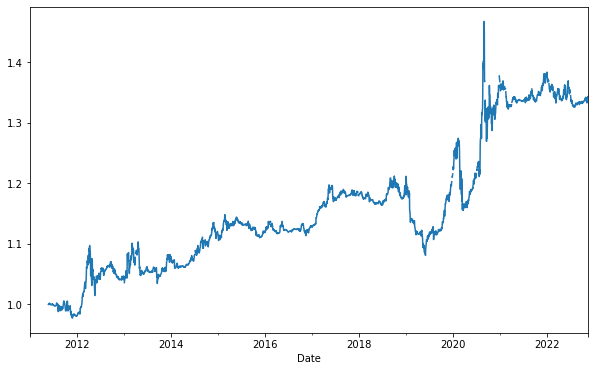

In [134]:
to_index(trade_rets).plot()

Giả sử bạn muốn phân tách hiệu suất chiến lược thành các giai đoạn giao dịch ngày càng
ít biến động hơn. Theo dõi độ lệch chuẩn hàng năm theo dõi một năm là một phép đo
đơn giản về sự biến động và chúng ta có thể tính toán tỷ lệ Sharpe để đánh giá tỷ lệ phần
thưởng trên rủi ro trong các chế độ biến động khác nhau:


In [135]:
vol = pd.Series.rolling(returns, 250, min_periods=200).std() * np.sqrt(250)

In [136]:
def sharpe(rets, ann=250):
 return rets.mean() / rets.std() * np.sqrt(ann)

Bây giờ, phân chia vào tứ phân vị với qcut và tổng hợp sharpe chúng tôi đạt được:

In [137]:
trade_rets.groupby(pd.qcut(vol, 4)).agg(sharpe)

Adj Close
(0.167, 0.228]    1.093464
(0.228, 0.268]    0.407602
(0.268, 0.307]   -0.117905
(0.307, 0.472]    0.621978
Name: Adj Close, dtype: float64

Những kết quả này cho thấy rằng chiến lược hoạt động tốt nhất trong thời kỳ mà sự biến
động là cao nhất.

## More Example Applications

## 3.1 Signal Frontier Analysis

Phân tích biên giới tín hiệu

Trong phần này, tôi sẽ mô tả một danh mục đầu tư động lượng mặt cắt ngang đơn giản
và cho thấy cách bạn có thể khám phá một mạng lưới các tham số hóa mô hình. Đầu tiên,
tôi sẽ tải giá lịch sử cho một danh mục các cổ phiếu tài chính và công nghệ:

In [138]:
import pandas_datareader.data as web

In [140]:
names = ['AAPL', 'GOOG', 'MSFT', 'GS', 'MS', 'BAC', 'C'] 


In [142]:
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = pd.DataFrame({n: get_px(n, '1/1/2009', '6/1/2012') for n in names})


Chúng tôi có thể dễ dàng vẽ biểu đồ lợi nhuận tích lũy của mỗi cổ phiếu:


In [143]:
px = px.asfreq('B').fillna(method='pad')


In [144]:
rets = px.pct_change()


<AxesSubplot:xlabel='Date'>

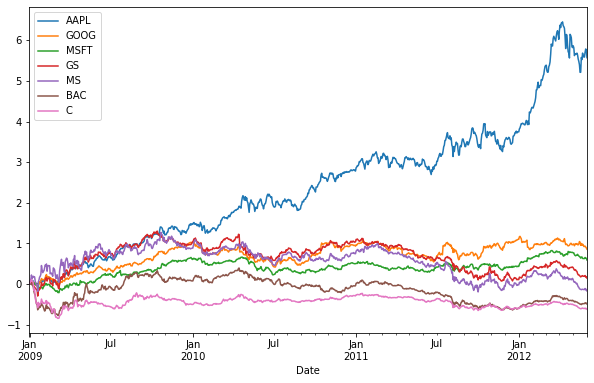

In [145]:
((1 + rets).cumprod() - 1).plot()


Đối với việc xây dựng danh mục đầu tư, chúng tôi sẽ tính toán động lượng qua một lần xem lại nhất định, sau đó
xếp hạng theo thứ tự giảm dần và chuẩn hóa:

In [146]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks - ranks.mean(axis=1)
    return demeaned / demeaned.std(axis=1)


In [147]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

GHI CHÚ:
PHẦN CODE DƯỚI ĐÂY GẶP LỖI DO KHÔNG CÒN ĐƯỢC HỖ TRỢ (xem chi tiết ở file latex)

In [148]:
def strat_sr(prices, lb, hold):
 # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)
    daily_rets = prices.pct_change()

 # Compute portfolio returns
    port = port.shift(1).resample(freq)
    returns = daily_rets.resample(freq)

    port_rets = (port * returns).sum(axis=1)

    print(type(port_rets))
    return daily_sr(port_rets) * np.sqrt(252 / hold)

Khi được gọi với prices và kết hợp tham số, hàm này trả về một giá trị vô hướng:

In [ ]:
strat_sr(px, 70, 30)

Từ đó, bạn có thể đánh giá hàm trên hoạt động trên một lưới các tham số, lưu trữ chúng
khi bạn đi vào sự kết luận và cuối cùng đưa kết quả vào DataFrame:


In [ ]:
from collections import defaultdic
lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)

In [ ]:
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)


In [ ]:
ddf = pd.DataFrame(dd)
ddf.index.name = ’Holding Period’
ddf.columns.name = ’Lookback Period’

Để trực quan hóa kết quả và có ý tưởng về những gì đang xảy ra, đây là một hàm sử
dụng matplotlib để tạo bản đồ nhiệt với một số trang trí:


In [ ]:
import matplotlib.pyplot as plt
def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation=’nearest’)
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
        ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

Gọi hàm này trên kết quả kiểm tra lại, chúng tôi nhận được:


In [ ]:
heatmap(ddf)

GHI CHÚ: BẮT ĐẦU TỪ PHẦN CODE NÀY ĐÃ CHẠY BÌNH THƯỜNG

## 3.2 Future Contract Rolling

Hợp đồng trong tương lai

Hợp đồng tương lai là một dạng hợp đồng phái sinh phổ biến; đó là một thỏa thuận để
nhận một tài sản nhất định (chẳng hạn như dầu, vàng hoặc cổ phiếu của chỉ số FTSE
100) vào một ngày cụ thể. Trong thực tế, mô hình hóa và giao dịch các hợp đồng tương
lai trên cổ phiếu, tiền tệ ,hàng hóa, trái phiếu và các loại tài sản khác rất phức tạp do tính
chất có thời hạn của mỗi hợp đồng. Ví dụ: tại bất kỳ thời điểm nào cho một loại tương
lai (chẳng hạn như hợp đồng tương lai bạc hoặc đồng), nhiều hợp đồng với các ngày hết
hạn có thể được giao dịch. Trong nhiều trường hợp, hợp đồng tương lai sẽ hết hạn tiếp
theo (ở gần hợp đồng) sẽ có tính thanh khoản cao nhất (khối lượng cao nhất và chênh
lệch giá mua-bán thấp nhất).

Đối với mục đích mô hình hóa và dự báo, có thể dễ dàng hơn nhiều để làm việc với chỉ
số hoàn vốn liên tục cho thấy lợi nhuận và thua lỗ liên quan đến việc luôn giữ hợp đồng
gần. Chuyển đổi từ hợp đồng hết hạn sang hợp đồng tiếp theo (hoặc xa hơn) được gọi là
rolling. Tính toán một chuỗi liên tục trong tương lai từ dữ liệu cá nhân không nhất thiết
phải là một bài tập đơn giản và thường đòi hỏi sự hiểu biết sâu sắc hơn về thị trường và
cách các công cụ được giao dịch. Ví dụ: trong thực tế, khi nào và bao lâu bạn sẽ giao
dịch ra khỏi một hợp đồng sắp hết hạn và vào hợp đồng tiếp theo? Ở đây tôi mô tả một
quá trình như vậy.

Đầu tiên, tôi sẽ sử dụng giá quy mô cho quỹ giao dịch trao đổi SPY làm đại diện cho
chỉ số S&P 500:


In [151]:
import pandas_datareader.data as web
# Approximate price of S&P 500 index
px = web.get_data_yahoo('SPY')['Adj Close'] * 10
px

Date
2017-11-21    2385.820312
2017-11-22    2383.710175
2017-11-24    2389.215851
2017-11-27    2388.023224
2017-11-28    2412.249146
                 ...     
2022-11-14    3951.199951
2022-11-15    3984.899902
2022-11-16    3954.500122
2022-11-17    3942.399902
2022-11-18    3960.299988
Name: Adj Close, Length: 1258, dtype: float64

Bây giờ, một chút thiết lập. Tôi đã đặt một số hợp đồng tương lai và ngày hết hạn của
S&P 500 vào một Series:

In [152]:
from datetime import datetime
expiry = {'ESU2': datetime(2012, 9, 21),
        'ESZ2': datetime(2012, 12, 21)}
expiry = pd.Series(expiry).sort_values()

expiry sẽ trông như thế này

In [153]:
expiry

ESU2   2012-09-21
ESZ2   2012-12-21
dtype: datetime64[ns]

Sau đó, tôi sử dụng Yahoo! Giá tài chính cùng với một bước đi ngẫu nhiên và một số
nhiễu để mô phỏng hai hợp đồng trong tương lai:

In [154]:
np.random.seed(12347)
N = 200

In [156]:
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25

In [157]:
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25

In [158]:
walk = walk.cumsum()

In [159]:
rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')

In [160]:
near = np.concatenate([px.values, px.values[-1] + walk])

In [161]:
far = np.concatenate([px.values, px.values[-1] + walk + perturb])

In [162]:
prices = pd.DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

prices sau đó có hai chuỗi thời gian cho các hợp đồng khác nhau một lượng ngẫu nhiên:

In [163]:
prices.tail()

,ESU2,ESZ2
2023-06-16,3889.049988,3886.549988
2023-06-19,3902.049988,3901.799988
2023-06-20,3895.049988,3894.549988
2023-06-21,3902.049988,3903.049988
2023-06-22,3898.049988,3900.299988


Một cách để nối các chuỗi thời gian với nhau thành một chuỗi liên tục là xây dựng ma
trận trọng số. Các hợp đồng đang hoạt động sẽ có trọng số là 1 cho đến khi ngày hết hạn
gần kề. Tại thời điểm đó, bạn phải quyết định một quy ước cuộn. Đây là một hàm tính
toán một ma trận trọng số với phân rã tuyến tính trong một số khoảng thời gian dẫn đến
hết hạn:


In [164]:
def get_roll_weights(start, expiry, items, roll_periods=5):
 # start : first date to compute weighting DataFrame
 # expiry : Series of ticker -> expiration dates
 # items : sequence of contract names
    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = pd.DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)
    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            #ix[] đã được thay bằng loc[]
            weights.loc[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                    periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.loc[roll_rng, item] = 1 - decay_weights
            weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.loc[prev_date:, item] = 1
    prev_date = ex_date
    return weights


Các trọng số trông như thế này xung quanh ESU2 expiry:


In [167]:

weights = get_roll_weights('6/1/2012', expiry, prices.columns)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21440\3480704168.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (item, ex_date) in enumerate(expiry.iteritems()):


In [169]:
weights.loc['2012-09-12':'2012-09-21']


,ESU2,ESZ2
2012-09-12,1.0,1.0
2012-09-13,1.0,1.0
2012-09-14,0.8,1.0
2012-09-17,0.6,1.0
2012-09-18,0.4,1.0
2012-09-19,0.2,1.0
2012-09-20,0.0,1.0
2012-09-21,0.0,1.0


Cuối cùng, lợi nhuận tương lai được chuyển nhượng chỉ là một tổng trọng số của lợi
nhuận hợp đồng:


In [171]:
rolled_returns = (prices.pct_change() * weights).sum(1)

3.3 Rolling Correlation and Linear Regression

Tương quan cuộn và hồi quy tuyến tính

Các mô hình động đóng một vai trò quan trọng trong mô hình tài chính vì chúng có
thể được sử dụng để mô phỏng các quyết định giao dịch trong một giai đoạn lịch sử. Di
chuyển cửa sổ và chức năng chuỗi thời gian có trọng số theo cấp số nhân là một ví dụ về
các công cụ được sử dụng cho các mô hình động.

Tương quan là một cách để xem xét sự đồng chuyển động giữa những thay đổi trong hai
chuỗi thời gian của nội dung. Hàm rolling-cor có thể được gọi với hai chuỗi trả về để tính
toán tương quan cửa sổ chuyển động. Đầu tiên, tôi tải một số chuỗi giá từ Yahoo!Finance
và tính toán lợi nhuận hàng ngày:

In [172]:
aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']

In [173]:
msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']

In [174]:
aapl_rets = aapl.pct_change()


In [175]:
msft_rets = msft.pct_change()

Sau đó, tôi tính toán và vẽ biểu đồ tương quan biến động trong một năm:

<AxesSubplot:xlabel='Date'>

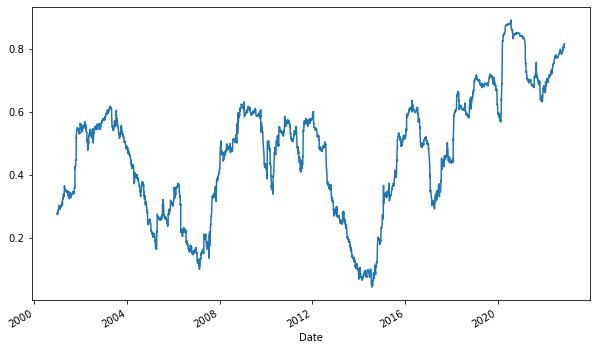

In [176]:
aapl_rets.rolling(250).corr(msft_rets).plot()
